# Example Workflow

This notebook demonstrates a basic workflow using the library.

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add the parent directory to the path so we can import our modules
sys.path.append('..')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_theme()

# Display all columns
pd.set_option('display.max_columns', None)

## 1. Load Data

First, let's load some stock price data using our data loader utility.

In [2]:
from src.utils.data_loader import download_stock_data

symbols = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META', 'TSLA', 'NVDA', 'BRK-B', 'JPM', 'JNJ']

stock_data = download_stock_data(
    symbols=symbols,
    start_date='2018-01-01',
    end_date='2023-01-01',
    interval='1d')

prices = stock_data['Close']
prices.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  10 of 10 completed


Ticker,AAPL,AMZN,BRK-B,GOOGL,JNJ,JPM,META,MSFT,NVDA,TSLA
Date,,,,,,,,,,
2018-01-02,40.479836,59.450500,197.220001,53.405170,113.850311,88.111298,180.568970,79.474167,4.929427,21.368668
2018-01-03,40.472786,60.209999,199.789993,54.316315,114.937851,88.201080,183.803741,79.844032,5.253850,21.150000
2018-01-04,40.660782,60.479500,200.690002,54.527306,114.929634,89.464600,183.465332,80.546776,5.281547,20.974667
2018-01-05,41.123726,61.457001,201.419998,55.250351,115.878197,88.890259,185.973526,81.545395,5.326304,21.105333
2018-01-08,40.970970,62.343498,202.740005,55.445419,116.025429,89.021538,187.396790,81.628609,5.489507,22.427334


## 2. Calculate Returns

Now, let's calculate daily returns and analyze performance.

In [3]:
from src.analysis.performance import calculate_returns, calculate_performance_metrics

# Calculate daily returns
returns = calculate_returns(prices, method='simple')
returns.head()

Ticker,AAPL,AMZN,BRK-B,GOOGL,JNJ,JPM,META,MSFT,NVDA,TSLA
Date,,,,,,,,,,
2018-01-03,-0.000174,0.012775,0.013031,0.017061,0.009552,0.001019,0.017914,0.004654,0.065814,-0.010233
2018-01-04,0.004645,0.004476,0.004505,0.003884,-0.000071,0.014325,-0.001841,0.008801,0.005272,-0.008290
2018-01-05,0.011386,0.016163,0.003637,0.013260,0.008253,-0.006420,0.013671,0.012398,0.008474,0.006230
2018-01-08,-0.003715,0.014425,0.006554,0.003531,0.001271,0.001477,0.007653,0.001020,0.030641,0.062638
2018-01-09,-0.000115,0.004676,0.001381,-0.001274,0.015857,0.005069,-0.002178,-0.000680,-0.000270,-0.008085


In [4]:
# Calculate performance metrics for each stock
performance = {}
for column in returns.columns:
    performance[column] = calculate_performance_metrics(returns[column])

# Convert to DataFrame for easier viewing
performance_df = pd.DataFrame(performance).T
performance_df

,Annualized Return,Annualized Volatility,Sharpe Ratio,Sortino Ratio,Maximum Drawdown,Calmar Ratio,Positive Periods,Negative Periods
AAPL,0.260229,0.334850,0.777150,1.081661,-0.385159,0.675640,0.527822,0.470588
AMZN,0.071698,0.358028,0.200259,0.280192,-0.561453,0.127701,0.529412,0.469793
BRK-B,0.094045,0.232307,0.404832,0.534866,-0.295699,0.318044,0.529412,0.468998
GOOGL,0.104742,0.313965,0.333611,0.455903,-0.443201,0.236332,0.526232,0.472973
JNJ,0.076988,0.208684,0.368920,0.465340,-0.273662,0.281323,0.526232,0.469793
JPM,0.075179,0.320819,0.234336,0.326305,-0.436265,0.172325,0.500000,0.496025
META,-0.078939,0.432307,-0.182600,-0.217462,-0.767361,-0.102871,0.511924,0.486486
MSFT,0.243065,0.310333,0.783241,1.070483,-0.371485,0.654308,0.538951,0.457075
NVDA,0.243006,0.518910,0.468302,0.660513,-0.663351,0.366332,0.531797,0.466614
TSLA,0.420347,0.655410,0.641350,0.938837,-0.733883,0.572771,0.519078,0.480127


## 3. Visualize the Data

Let's create some visualizations to better understand our data.

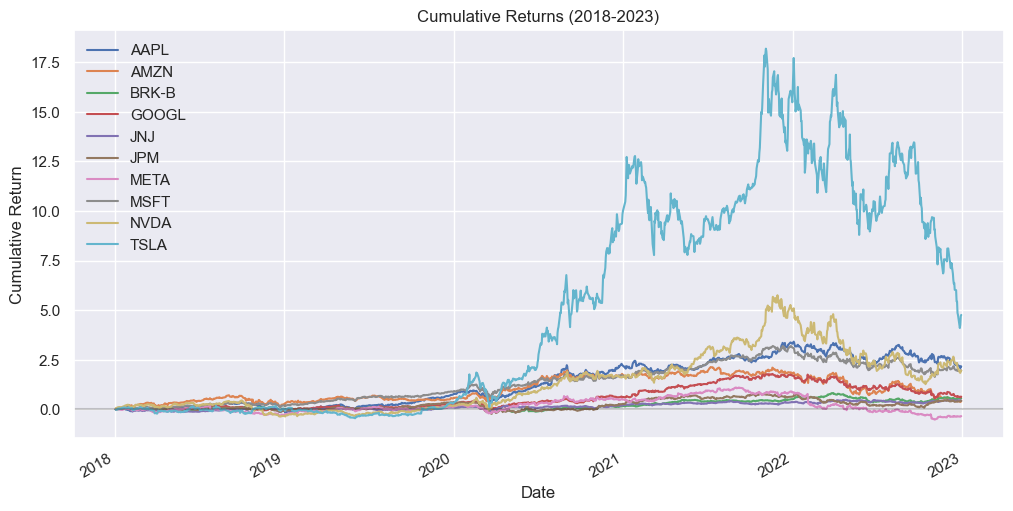

In [11]:
from src.visualization.plots import plot_cumulative_returns, plot_correlation_matrix

# Plot cumulative returns
fig = plot_cumulative_returns(returns, title='Cumulative Returns (2018-2023)')
plt.show()

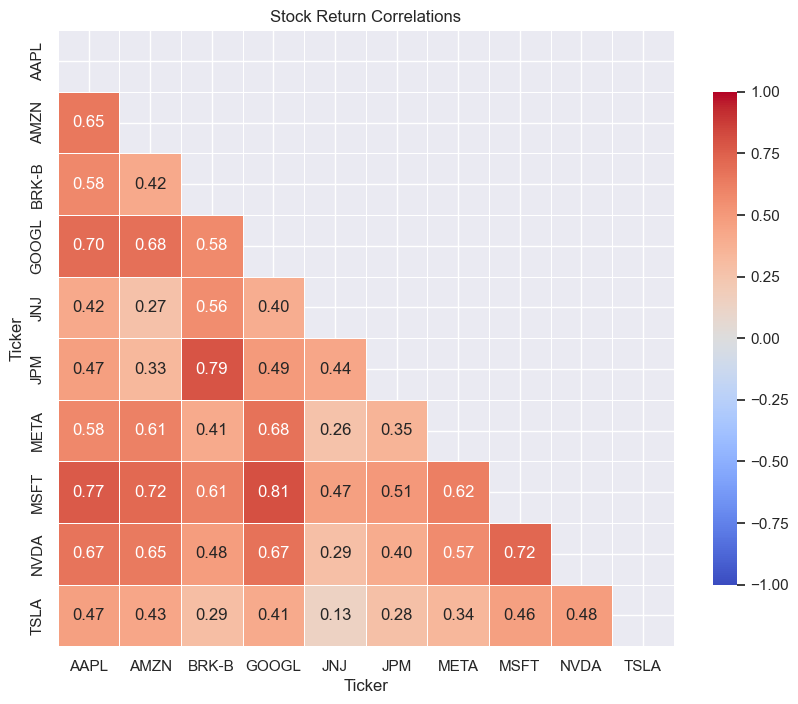

In [12]:
# Plot correlation matrix
fig = plot_correlation_matrix(returns, title='Stock Return Correlations')
plt.show()

## 4. Implement a Strategy

Let's implement a simple momentum strategy.

In [13]:
from src.strategies.momentum import momentum_rank_strategy

# Implement a momentum strategy that selects the top 3 stocks based on 6-month momentum
weights, momentum_scores = momentum_rank_strategy(
    prices=prices,
    lookback_period=126,  # ~6 months of trading days
    skip_recent=21,       # Skip the most recent month
    n_top=3,              # Select top 3 stocks
    rebalance_freq='M'    # Rebalance monthly
)

# View the weights at the last rebalance date
weights.iloc[-1]

c:\Users\Austin\iCloudDrive\armchairQuant\abFinance\notebooks\..\src\strategies\momentum.py:55: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  prices_rebal = prices.resample(rebalance_freq).last()


Ticker
AAPL     0.0
AMZN     0.0
BRK-B    0.0
GOOGL    0.0
JNJ      0.0
JPM      0.0
META     0.0
MSFT     0.0
NVDA     0.0
TSLA     0.0
Name: 2022-12-30 00:00:00, dtype: float64

## 5. Backtest the Strategy

Now let's calculate the performance of our strategy.

In [14]:
# Calculate strategy returns
strategy_returns = (weights.shift(1) * returns).sum(axis=1)
strategy_returns = strategy_returns.dropna()

# Calculate an equal-weight benchmark
equal_weight = pd.DataFrame(1/len(symbols), index=returns.index, columns=returns.columns)
benchmark_returns = (equal_weight * returns).sum(axis=1)

# Compare performance
strategy_performance = calculate_performance_metrics(strategy_returns)
benchmark_performance = calculate_performance_metrics(benchmark_returns)

# Display results
pd.DataFrame({
    'Momentum Strategy': strategy_performance,
    'Equal Weight': benchmark_performance
})

,Momentum Strategy,Equal Weight
Annualized Return,0.0,0.188235
Annualized Volatility,0.0,0.274958
Sharpe Ratio,0.0,0.684597
Sortino Ratio,0.0,0.874369
Maximum Drawdown,0.0,-0.374454
Calmar Ratio,0.0,0.502692
Positive Periods,0.0,0.567568
Negative Periods,0.0,0.432432


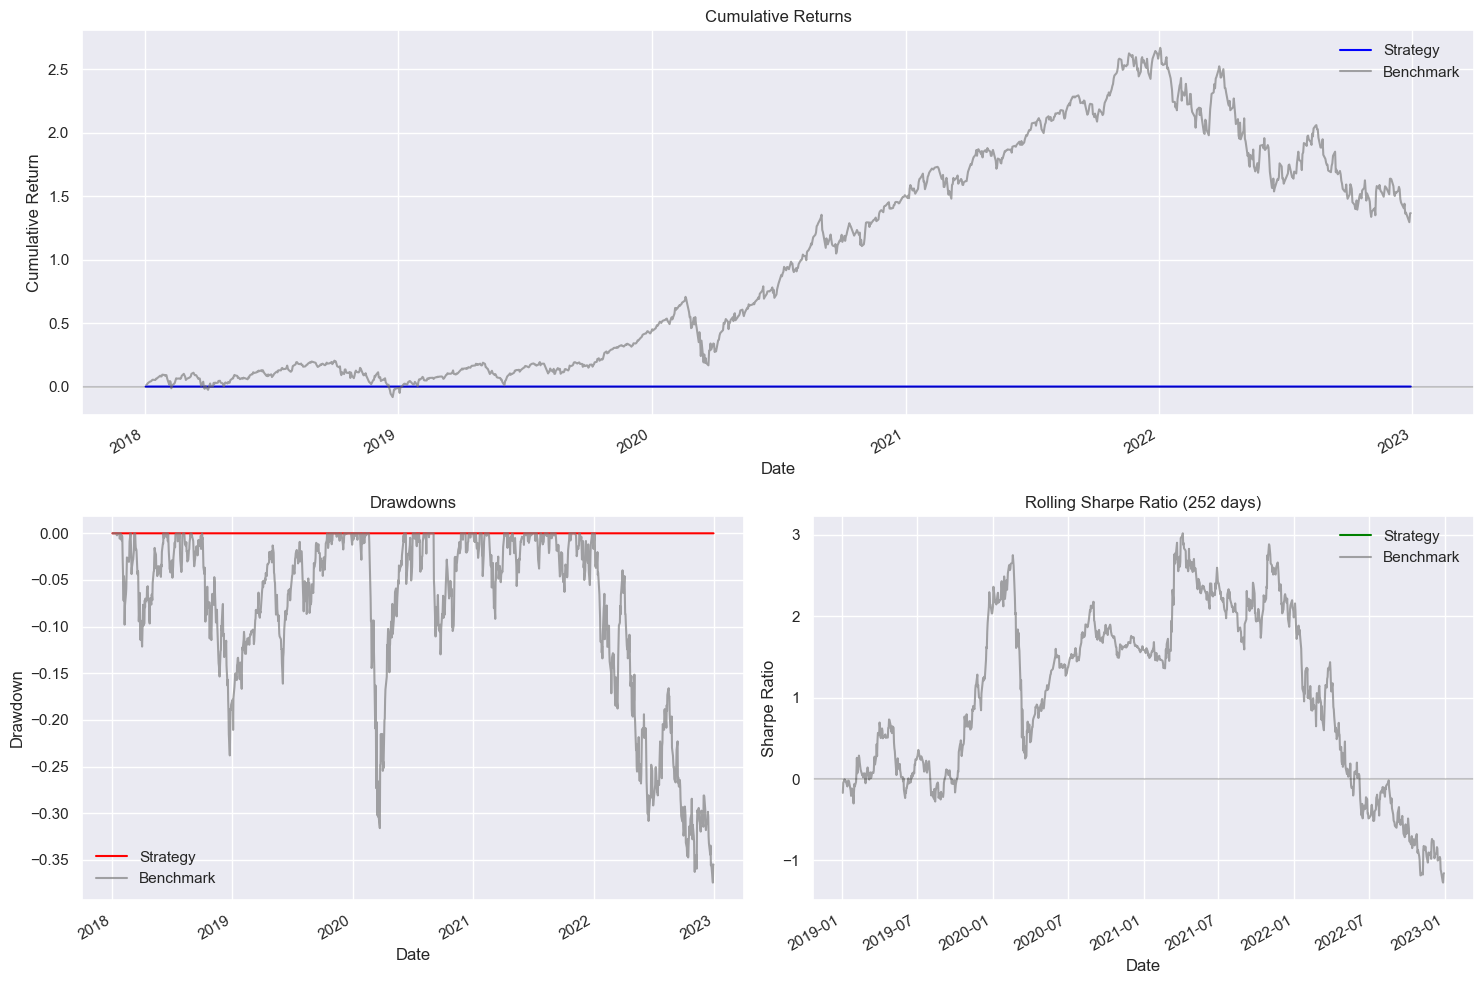

In [15]:
from src.visualization.plots import plot_performance_summary

# Create a performance summary plot
fig = plot_performance_summary(
    returns=strategy_returns,
    benchmark_returns=benchmark_returns,
    risk_free_rate=0.02  # Assume 2% risk-free rate
)
plt.show()

## 6. Create a Portfolio

Finally, let's create a portfolio object to track our positions.

In [16]:
from datetime import datetime
from src.core.asset import Stock
from src.core.portfolio import Portfolio, Position

# Create asset objects
assets = {
    symbol: Stock(symbol=symbol, name=symbol) for symbol in symbols
}

# Create a portfolio
portfolio = Portfolio(name="Momentum Portfolio")

# Add positions based on the last weights
last_weights = weights.iloc[-1]
for symbol, weight in last_weights.items():
    if weight > 0:
        # Assume we have $100,000 to invest
        investment_amount = 100000 * weight
        price = prices[symbol].iloc[-1]
        quantity = investment_amount / price
        
        position = Position(
            asset=assets[symbol],
            quantity=quantity,
            purchase_price=price,
            purchase_date=prices.index[-1]
        )
        
        portfolio.add_position(position)

# View the portfolio
portfolio.to_dataframe()

""
